In [3]:
import pandas as pd
import seaborn as sns
import os

# 나이와 치사율의 관계

In [4]:
time_age = pd.read_csv('data/TimeAge.csv')

In [5]:
time_age

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


1. age 별로 그룹화
2. deceased / confirmed 통계 내기
3. 어느 연령대에서 더 높은 비율이 나왔는지 확인

In [6]:
time_age['age'].value_counts()

10s    121
20s    121
30s    121
60s    121
0s     121
50s    121
70s    121
40s    121
80s    121
Name: age, dtype: int64

In [7]:
age_grouped = time_age.groupby('age').sum()
df=pd.DataFrame(age_grouped)

<AxesSubplot:ylabel='age'>

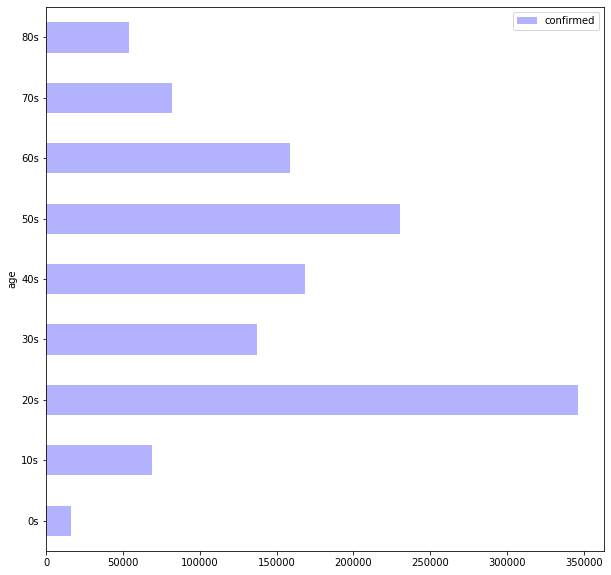

In [13]:
df.plot(kind = "barh",color='b', y = 'confirmed', alpha=0.3, figsize=(10, 10))

In [14]:
age_grouped['ratio'] = age_grouped['deceased'] / age_grouped['confirmed']
age_grouped

,time,confirmed,deceased,ratio
age,,,,
0s,0,16107,0,0.000000
10s,0,68752,0,0.000000
20s,0,345827,0,0.000000
30s,0,137539,194,0.001411
40s,0,168250,295,0.001753
50s,0,230030,1537,0.006682
60s,0,158505,3743,0.023614
70s,0,82107,7599,0.092550
80s,0,54086,12136,0.224383


<AxesSubplot:ylabel='age'>

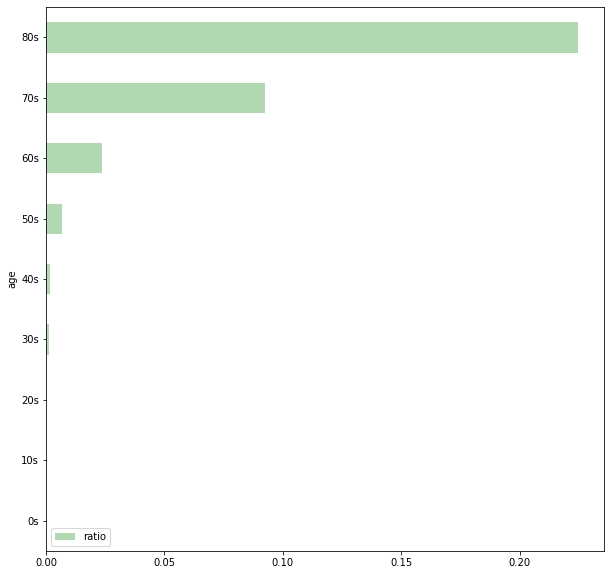

In [17]:
df=pd.DataFrame(age_grouped)
df.plot(kind = "barh",color='g', y = 'ratio', alpha=0.3, figsize=(10, 10))

- 나이가 올라감에 따라 치사율이 올라가는 것을 확인할 수 있다.
- 70대와 80대가 압도적으로 높다.

# 성별과 치사율의 관계

In [18]:
time_gender = pd.read_csv('data/TimeGender.csv')

In [19]:
time_gender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


In [20]:
gender_grouped = time_gender.groupby('sex').sum()
gender_grouped

,time,confirmed,deceased
sex,,,
female,0,747467,12019
male,0,513727,13484


<AxesSubplot:xlabel='sex'>

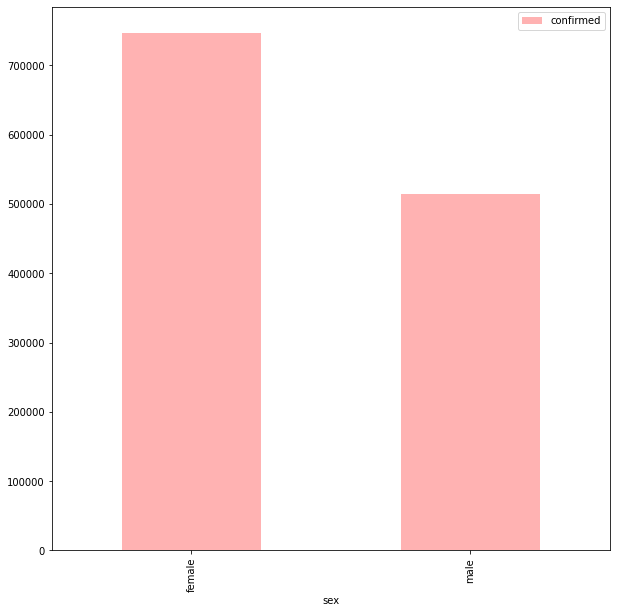

In [31]:
df=pd.DataFrame(gender_grouped)
df.plot(kind = "bar",color='r', y = 'confirmed', alpha=0.3, figsize=(10, 10))

In [24]:
gender_grouped['ratio'] = gender_grouped['deceased'] / gender_grouped['confirmed']
gender_grouped

,time,confirmed,deceased,ratio
sex,,,,
female,0,747467,12019,0.016080
male,0,513727,13484,0.026247


<AxesSubplot:ylabel='ratio'>

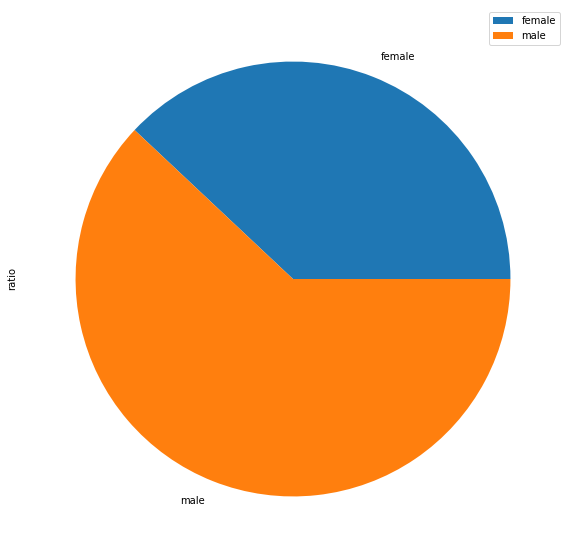

In [30]:
df=pd.DataFrame(gender_grouped)
df.plot(kind = "pie",y = 'ratio',figsize=(10, 10),normalize=True)

- 확진자의 수는 여성이 남성보다 많았지만 치명률은 반대이다.

## 결론
- 연령대가 높을 수록 치명률이 높고, 남성이 여성보다 치명률이 높다.
- 20대에 확진자가 제일 많았다.

-> 20대의 확진자 수가 많은 이유를 찾고자 한다.